# <center>Laboratorium 10<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, uzupełnić plik main.py, wykonać test na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

***Materiały przygotowujące:***


In [8]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
from numpy.polynomial import polynomial as P
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych lub inaczej mówiąc metodami znajdowania miejsc zerowych funkcji.
W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$, należy wyznaczyć argumenty funkcji $x$, dla których $f(x) = 0$ (funkcja jest równa zero). 

Argumenty $x^*$, dla których $f(x)=0$ nazywamy *pierwiastkami*.

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Dany jest wielomian postaci $W(x)=(x-1)(x-2)\cdot \ldots \cdot (x-20)$.

1. Zdefinuj funkcję *polly_A*, która obliczy współczynniki wielomianu $a_i$ w postaci ogólnej wielomianu $w(x)=a_nx^n+\ldots +a_2x^2+a_1x+1$. Skonstruuj wektor tych współczynników. Użyj funkcji [polyfromroots](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polynomial.polynomial.polyfromroots.html#numpy.polynomial.polynomial.polyfromroots) oraz *linspace*.
2. Zdefinuj funkcję *roots_20*, która w pętli 20 iteracji będzie:  

   i. konstruować wektor współczynników nowego wielomianu w następujący sposób: do każdego wygenerowanego wektora współczynników dodać losową wartość w postaci $(10^{-10})N(0,1)$. Użyj funkcji [random_sample](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample).  
  ii. wyliczyać pierwiaski tego wielomianu za pomocą metody [polyroots](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyroots.html#numpy.polynomial.polynomial.polyroots).

3. Narysuj na wykresie te pierwiastki (w każdej iteracji dorysowywać pierwiastki na tym samym rysunku).
4. Określić, który pierwiastek jest najbardziej wrażliwy na zaburzenia.
5. Zaproponować sposób oszacowania uwarunkowania każdego z pierwiastków.

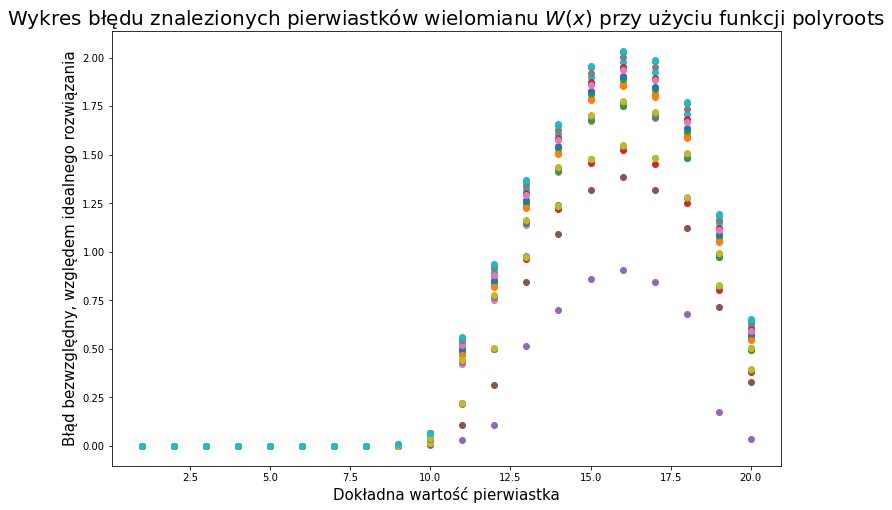

In [17]:
roots = np.arange(1,21)
plt.figure(figsize=(12, 8))
wsp = main.polly_A(roots)
for i in range (20):
    _, new_roots = main.roots_20(wsp)
    plt.plot(roots,np.abs(roots - new_roots),'o')
plt.title('Wykres błędu znalezionych pierwiastków wielomianu $W(x)$ przy użyciu funkcji polyroots',fontsize=20)
plt.xlabel('Dokładna wartość pierwiastka',fontsize=15)
plt.ylabel('Błąd bezwzględny, względem idealnego rozwiązania',fontsize=15)
plt.show()

Na wykresie wyraźnie widać, że na zaburzenia najmniej odporne są pierwiastki z zakresu od 11 do 20. Widać również, że najbardziej wrażliwy na zaburzenia jest  pierwiastek 16. Sposób uwarunkowania każdego z pierwiastków może być w dużym stopniu zależny od charakteru przebiegu funkcji w miejscu zerowym, a taką informację dostarcza nam pochodna funkcji. Dlatego jako sposób uwarunkowania proponują moduł pochodnej funkcji w danym zerze funkcji $cond(x_n)=|f'(x_n)|$.

***Zadanie 2.***  
Dany jest wielomian $w_1(x)=(x-1)^8$. Wyznacz numerycznie miejsca zerowego tego wielomianu poprzez wyznaczenie wartości własnych macierzy Frobeniusa. W związku z tym wykonaj następujące czynności:  

1. Zaiplementuj funkcję tworzącą [macierz Frobenusa](https://github.com/KAIR-ISZ/public_lectures/blob/master/Metody%20Numeryczne%202019/Lecture%204%20(nonlinear%20equations)/Metody%20numeryczne%202019%20-%20R%C3%B3wnania%20nieliniowe.pdf) *frob_a*, dla zadanego wektora współczynników wielomianu $w(x)$.  
2. Wyznacz wartości własne przekształconej macierzy za pomocą funkcji [eigvals](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html#numpy.linalg.eigvals).  
3. Dokonaj rozkładu Schura macierzy zdefiniowanej w punkcie 1. użyj funkcji [schure](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.schur.html#scipy.linalg.schur).  
4. Porównaj wyniki z funkcją polyroots.

Uwarunkowanie macierzy Frobeniusa wynosi:  12869.999922299921


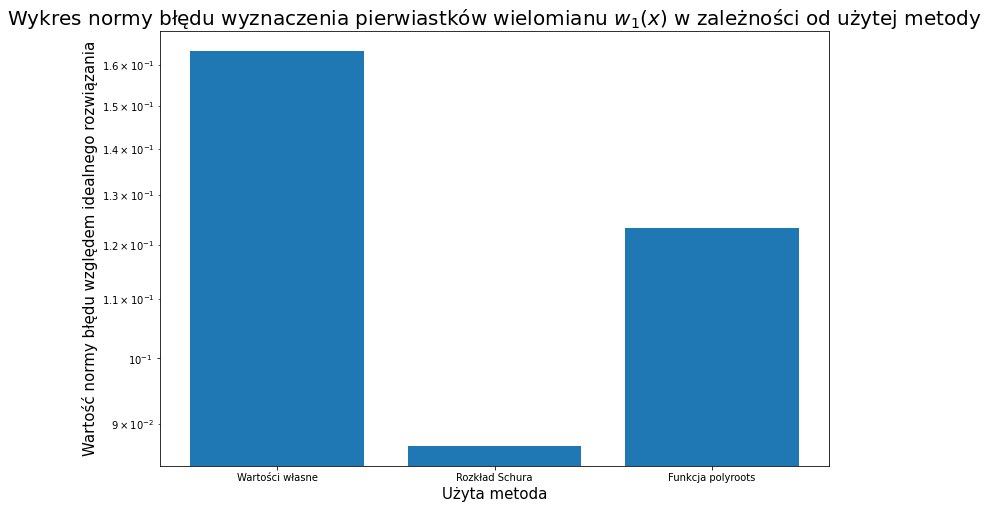

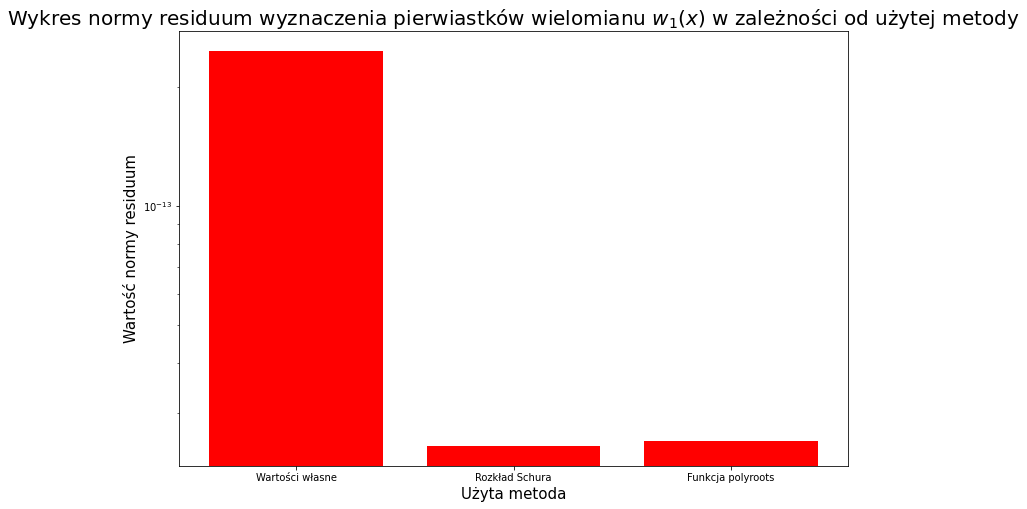

In [10]:
w1 = lambda x: (x-1)**8
roots = np.ones(8)
wsp = main.polly_A(roots)
frob, eigvals, schur, _ = main.frob_a(wsp[:-1]/wsp[-1])
polyroots_roots = P.polyroots(wsp)
error = [np.linalg.norm(eigvals - roots,ord=1), np.linalg.norm(np.diag(schur[0]) - roots,ord=1), np.linalg.norm(polyroots_roots - roots,ord=1)]
plt.figure(figsize=(12, 8))
plt.bar(['Wartości własne','Rozkład Schura','Funkcja polyroots'],error)
plt.title('Wykres normy błędu wyznaczenia pierwiastków wielomianu $w_1(x)$ w zależności od użytej metody',fontsize=20)
plt.xlabel('Użyta metoda',fontsize=15)
plt.ylabel('Wartość normy błędu względem idealnego rozwiązania',fontsize=15)
plt.yscale('log')
print('Uwarunkowanie macierzy Frobeniusa wynosi: ',np.linalg.cond(frob))
plt.show()
error = [np.linalg.norm(w1(eigvals),ord=1), np.linalg.norm(w1(np.diag(schur[0])),ord=1), np.linalg.norm(w1(polyroots_roots),ord=1)]
plt.figure(figsize=(12, 8))
plt.bar(['Wartości własne','Rozkład Schura','Funkcja polyroots'],error,color='red')
plt.title('Wykres normy residuum wyznaczenia pierwiastków wielomianu $w_1(x)$ w zależności od użytej metody',fontsize=20)
plt.xlabel('Użyta metoda',fontsize=15)
plt.ylabel('Wartość normy residuum',fontsize=15)
plt.yscale('log')
plt.show()

***Zadanie 3.***  
Dla danego wielomianu $w_2(x) = 243x^7-486x^6+783x^5-990x^4+558x^3-28x^2-72x+16$ wyznacz miejsca zerowe numerycznie, w taki sam sposób jak w zadaniu 2.


Uwarunkowanie macierzy Frobeniusa wynosi:  567.3907272580342


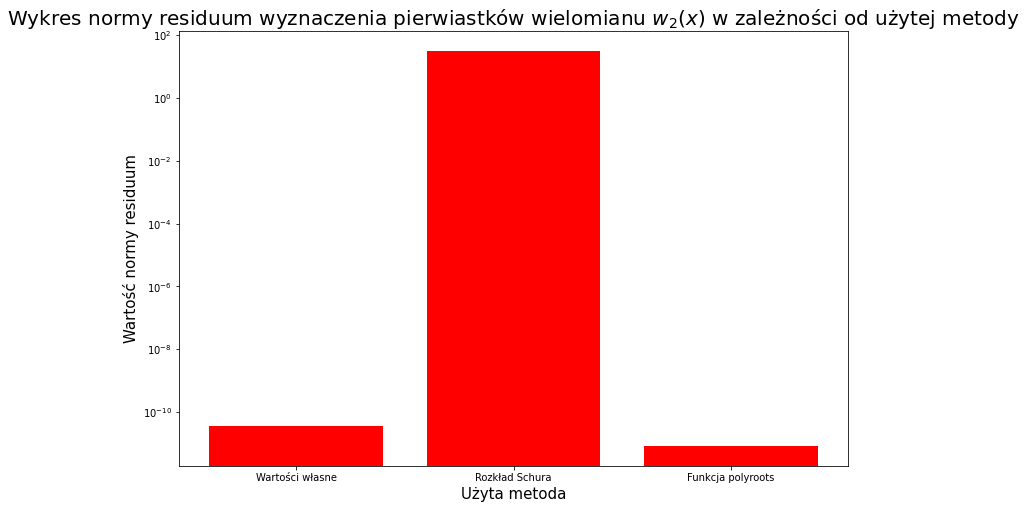

In [11]:
w2 = lambda x: 243*x**7 -486*x**6 +783*x**5 -990*x**4 +558*x**3 -28*x**2 -72*x + 16
wsp = np.array([16, -72, -28, 558, -990, 783, -486, 243])
frob, eigvals, schur, _ = main.frob_a(wsp[:-1]/wsp[-1])
polyroots_roots = P.polyroots(wsp)
error = [np.linalg.norm(w2(eigvals),ord=1), np.linalg.norm(w2(np.diag(schur[0])),ord=1), np.linalg.norm(w2(polyroots_roots),ord=1)]
plt.figure(figsize=(12, 8))
plt.bar(['Wartości własne','Rozkład Schura','Funkcja polyroots'],error,color='red')
plt.title('Wykres normy residuum wyznaczenia pierwiastków wielomianu $w_2(x)$ w zależności od użytej metody',fontsize=20)
plt.xlabel('Użyta metoda',fontsize=15)
plt.ylabel('Wartość normy residuum',fontsize=15)
plt.yscale('log')
print('Uwarunkowanie macierzy Frobeniusa wynosi: ',np.linalg.cond(frob))
plt.show()

Na powyższych wykresach można zobaczyć jak uwarunkowanie macierzy frobeniusa charakterystycznej dla danego wielomianu ma wpływ na błędy numeryczne w wyznaczaniu jego pierwiastków (wartości własne) generowanych przez metodę. W pierwszym przypadku, gdy uwarunkowanie jest na wysokim poziomie, można zaobserwować duże błędy w przeciwieństwie do drugiego przypadku gdy uwarunkowanie jest mniejsze, stąd generowane błędy są na niskim poziomie. Widać również, że rozkład Schura macierzy doskonale poradził sobie z wielomianem posiadającym jako pierwiastki osiem jedynek (wynik jest nawet lepszy niż użycie funkcji polyroots), ale za to najwyższy błąd generowany podczas wyznaczania zer dla wielomianu numer 2 jest nieakceptowalny. Funkcja polyroots poradziła sobie dobrze w każdym z przypadków.

***Zadanie 4.***

Dany jest wielomian: 
$$
w_3(x)= x^5 - 156x^4 - 5x^3 + 780x^2 + 4x - 624
$$.
 Wiedząc, że wielomian ten w postaci szeregu Czebyszewa jest następujący 
 $$w_3(x)= (a_0+\frac{a_2}{2}+ \frac{3a_4}{4})T_0(x)+(a_1+\frac{3a_3}{4}+ \frac{5a_5}{8})T_1(x)+(\frac{a_2}{2}+ \frac{a_4}{4})T_2(x)+(\frac{a_3}{4}+ \frac{5a_5}{16})T_3(x)+ (\frac{a_4}{8})T_4 + (\frac{a_5}{16})T_5(x)$$ 
 znajdź pierwiastki wykorzystując funkcję [chebroots](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebroots.html).

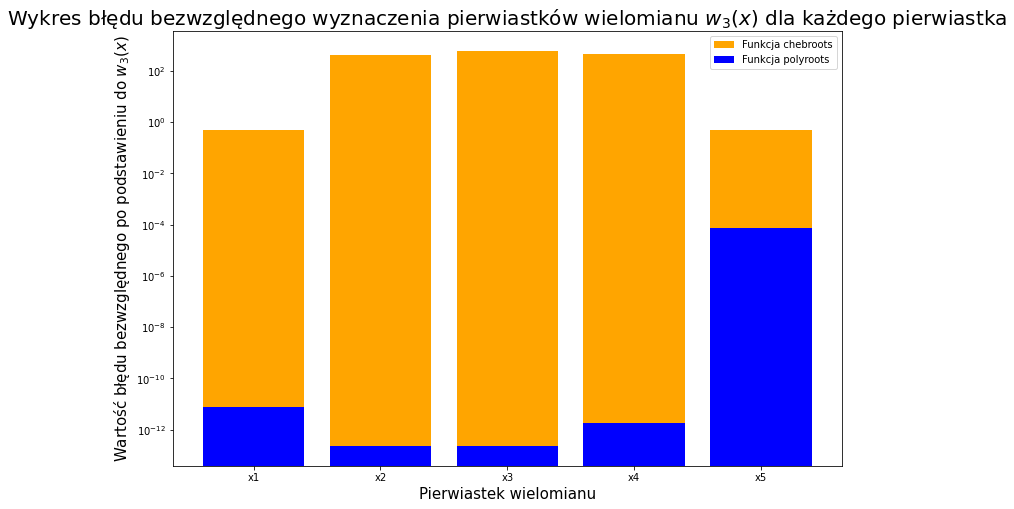

In [22]:
w3 = lambda x : x**5 -156*x**4 -5*x**3 +780*x**2 +4*x -624
wsp = np.array([-624, 4, 780, -5, -156, 1])
polyroots_roots = np.sort(P.polyroots(wsp))
polyroots_roots_error = np.abs(w3(polyroots_roots))
wsp = np.flip(wsp)
wsp_for_cheb = np.array([wsp[0] +wsp[2]/2 +3*wsp[4]/4, wsp[1] +3*wsp[3]/4 +5*wsp[5]/8, wsp[2]/2 +wsp[4]/4, wsp[3]/4 +5*wsp[5]/16, wsp[4]/8, wsp[5]/16])
chebroots_roots = np.sort(np.polynomial.chebyshev.chebroots(wsp_for_cheb))
chebroots_roots_error = np.abs(w3(chebroots_roots))
plt.figure(figsize=(12, 8))
plt.bar(['x1','x2','x3','x4','x5'],chebroots_roots_error,color='orange')
plt.bar(['x1','x2','x3','x4','x5'],polyroots_roots_error,color='blue')
plt.title('Wykres błędu bezwzględnego wyznaczenia pierwiastków wielomianu $w_3(x)$ dla każdego pierwiastka',fontsize=20)
plt.xlabel('Pierwiastek wielomianu',fontsize=15)
plt.ylabel('Wartość błędu bezwzględnego po podstawieniu do $w_3(x)$',fontsize=15)
plt.legend(['Funkcja chebroots','Funkcja polyroots'])
plt.yscale('log')
plt.show()

In [14]:
wsp = np.flip(wsp)
print('Złożoność czasowa obydwu algorytmów:')
print('Dla funkcji chebroots:')
chebroots_time = %timeit -o -r 100 -n 1000 np.polynomial.chebyshev.chebroots(wsp_for_cheb)
print('Dla funkcji polyroots:')
polyroots_time = %timeit -o -r 100 -n 1000 P.polyroots(wsp)
print('')
print('Złożoność pamięciowa obydwu algorytmów:')
print('Dla funkcji chebroots:')
chebroots_memory = %memit -o np.polynomial.chebyshev.chebroots(wsp_for_cheb)
print('Dla funkcji polyroots:')
polyroots_memory = %memit -o P.polyroots(wsp)

Złożoność czasowa obydwu algorytmów:
Dla funkcji chebroots:
50 µs ± 8.79 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)
Dla funkcji polyroots:
40.7 µs ± 1.65 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)

Złożoność pamięciowa obydwu algorytmów:
Dla funkcji chebroots:
peak memory: 119.81 MiB, increment: 0.03 MiB
Dla funkcji polyroots:
peak memory: 119.81 MiB, increment: 0.03 MiB


Funkcja wykorzystująca szereg czebyszewa do wyznaczania pierwiastków wielomianu dała niestety zaskakująco złe wyniki. Nie dość, że błędy po podstawieniu wyznaczonych wartości do wyjściowego wielomianu są bardzo duże, niekiedy przekraczając nawet 300, to do tego metoda ta jest gorsza pod względem czasu wykonywania od funkcji polyroots. Jeśli chodzi o złożoność pamięciową to obie funkcje wykorzystały dokładnie tyle samo pamięci operacyjnej. Na wykresie widać, że pierwiastek nr 5 wydaje się wpadać w znacząco większe zaburzenie przy użyciu funkcji polyroots niż pozostałe pierwiastki wyznaczone tą metodą. Ta obserwacja nie dotyczy jednak funkcji chebroots co wydaje się być jej jedyną zaletą w tym zestawieniu.